Acknowledgement: This code was initially inspired by the lab "COMP34212_Lab2b_Keras_CNN_CIFAR_2025" before undergoing significant changes.

# Setup

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import utils
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, SpatialDropout2D
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Input, Add
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

print('Libraries imported.')

Libraries imported.


# Data Preperation

In [ ]:



cifar100_fine_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

cifar100_coarse_labels = [
    'aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables',
    'household electrical devices', 'household furniture', 'insects', 'large carnivores',
    'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores',
    'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals',
    'trees', 'vehicles 1', 'vehicles 2'
]


fine_to_coarse_mapping = {
    0: 4, 1: 1, 2: 14, 3: 8, 4: 0, 5: 6, 6: 7, 7: 7,
    8: 18, 9: 3, 10: 3, 11: 14, 12: 9, 13: 18, 14: 7, 15: 11,
    16: 3, 17: 9, 18: 7, 19: 11, 20: 6, 21: 11, 22: 5, 23: 10,
    24: 7, 25: 6, 26: 13, 27: 15, 28: 3, 29: 15, 30: 0, 31: 11,
    32: 1, 33: 10, 34: 12, 35: 14, 36: 16, 37: 9, 38: 11, 39: 5,
    40: 5, 41: 19, 42: 8, 43: 8, 44: 15, 45: 13, 46: 14, 47: 17,
    48: 18, 49: 10, 50: 16, 51: 4, 52: 17, 53: 4, 54: 2, 55: 0,
    56: 17, 57: 4, 58: 18, 59: 17, 60: 10, 61: 3, 62: 2, 63: 12,
    64: 12, 65: 16, 66: 12, 67: 1, 68: 9, 69: 19, 70: 2, 71: 10,
    72: 0, 73: 1, 74: 16, 75: 12, 76: 9, 77: 13, 78: 15, 79: 13,
    80: 16, 81: 18, 82: 2, 83: 4, 84: 6, 85: 19, 86: 5, 87: 5,
    88: 8, 89: 19, 90: 18, 91: 1, 92: 2, 93: 15, 94: 6, 95: 0,
    96: 17, 97: 8, 98: 14, 99: 13
}

In [ ]:

BATCH_SIZE = 256
N_EPOCH = 150
N_CLASSES = 100
N_SUPERCLASSES = 20
VERBOSE = 1
VALIDATION_SPLIT = 0.2

print('Main variables initialised.')


IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')


Main variables initialised.
Image variables initialisation


In [ ]:

(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar100.load_data(label_mode='fine')
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')


output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)


input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Sample input image class: apple


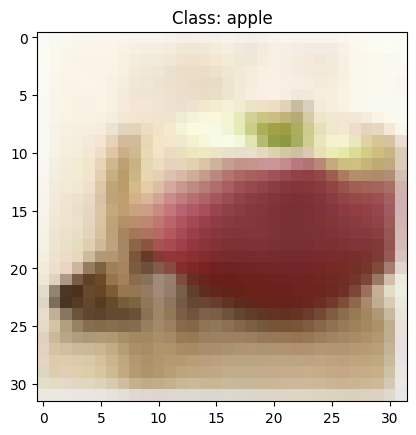

Sample input image class: boy


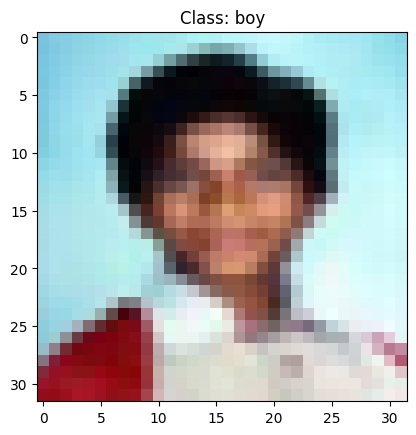

In [ ]:

Selected_Image = 2
image = input_X_train[Selected_Image]
print("Sample input image class:", cifar100_fine_labels[output_y_train[Selected_Image][0]])
plt.imshow(image)
plt.title(f"Class: {cifar100_fine_labels[output_y_train[Selected_Image][0]]}")
plt.show()

Selected_Image = 3
image = input_X_train[Selected_Image]
print("Sample input image class:", cifar100_fine_labels[output_y_train[Selected_Image][0]])
plt.imshow(image)
plt.title(f"Class: {cifar100_fine_labels[output_y_train[Selected_Image][0]]}")
plt.show()

## Data Augmentation

In [ ]:
seed = 42


train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15,
    rotation_range=15,
    validation_split=VALIDATION_SPLIT
)


validation_datagen = ImageDataGenerator(
    validation_split=VALIDATION_SPLIT
)


train_generator = train_datagen.flow(
    input_X_train,
    output_Y_train,
    batch_size=BATCH_SIZE,
    subset='training',
    shuffle=True,
    seed=seed
)

validation_generator = validation_datagen.flow(
    input_X_train,
    output_Y_train,
    batch_size=BATCH_SIZE,
    subset='validation',
    seed=seed
)



# Training

In [ ]:
def identity_block(x, filters, dropout_rate):
    x_skip = x


    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)


    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)


    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


In [ ]:
def conv_block(x, filters, stride, dropout_rate):
    x_skip = x


    x = Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)


    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)


    x_skip = Conv2D(filters, 1, strides=stride, padding='same')(x_skip)
    x_skip = BatchNormalization()(x_skip)

    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


In [ ]:

inputs = Input(shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS))


x = Conv2D(64, 3, strides=1, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)




x = conv_block(x, 64, stride=1, dropout_rate=0.3)
x = identity_block(x, 64, dropout_rate=0.3)


x = conv_block(x, 128, stride=2, dropout_rate=0.3)
x = identity_block(x, 128, dropout_rate=0.3)


x = conv_block(x, 256, stride=2, dropout_rate=0.3)
x = identity_block(x, 256, dropout_rate=0.3)


x = Dropout(0.2)(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(N_CLASSES, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
class TrainingMonitor(Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = K.get_value(self.model.optimizer.learning_rate)
        print(f"\nEpoch {epoch+1}")
        print(f"LR: {lr:.1e}\n")
        print(f"  Training Loss: {logs['loss']:.4f} - Training Accuracy: {logs['accuracy']:.4f}")
        print(f"  Validation Loss: {logs['val_loss']:.4f} - Validation Accuracy: {logs['val_accuracy']:.4f}")
        if logs['accuracy'] - logs['val_accuracy'] > 0.15:
            print(f"! Overfitting: {logs['accuracy']-logs['val_accuracy']:.4f} gap")



In [ ]:

OPTIM1 = tf.keras.optimizers.AdamW(
    learning_rate=0.001,
    weight_decay=0.01,
    global_clipnorm=1.0,
)


loss_function = CategoricalCrossentropy(label_smoothing=0.1)


model.compile(loss=loss_function, optimizer=OPTIM1, metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 32, 32, 64)     │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 32, 32, 64)     │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 32, 32, 64)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 32, 32, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 32, 32, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 32, 32, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 32, 32, 64)     │          4,160 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 32, 32, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 32, 32, 64)     │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 32, 32, 64)     │              0 │ dropout[0][0],         │
│                           │                        │                │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 32, 32, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 32, 32, 64)     │            256 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activat

 Total params: 2,811,940 (10.73 MB)

 Trainable params: 2,807,332 (10.71 MB)

 Non-trainable params: 4,608 (18.00 KB)

In [ ]:

early_stop = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=10,
    restore_best_weights=True,
    start_from_epoch=10
)

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=6,
    min_lr=1e-6,
    mode='max',
    cooldown=1,
    verbose=1
)

In [ ]:

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

In [ ]:
history = model.fit(
    train_generator,
    batch_size=BATCH_SIZE,
    epochs=N_EPOCH,
    validation_data=validation_generator,
    verbose=VERBOSE,
    callbacks=[
        early_stop,
        checkpoint,
        TrainingMonitor(),
        reduce_lr,
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.0838 - loss: 4.2363
Epoch 1: val_accuracy improved from -inf to 0.01730, saving model to best_model.h5



Epoch 1
LR: 1.0e-03

  Training Loss: 3.9586 - Training Accuracy: 0.1215
  Validation Loss: 5.8490 - Validation Accuracy: 0.0173
157/157 ━━━━━━━━━━━━━━━━━━━━ 72s 250ms/step - accuracy: 0.0841 - loss: 4.2345 - val_accuracy: 0.0173 - val_loss: 5.8490 - learning_rate: 0.0010
Epoch 2/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.2069 - loss: 3.5105
Epoch 2: val_accuracy improved from 0.01730 to 0.06960, saving model to best_model.h5



Epoch 2
LR: 1.0e-03

  Training Loss: 3.4307 - Training Accuracy: 0.2270
  Validation Loss: 4.8216 - Validation Accuracy: 0.0696
! Overfitting: 0.1574 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.2070 - loss: 3.5100 - val_accuracy: 0.0696 - val_loss: 4.8216 - learning_rate: 0.0010
Epoch 3/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.2866 - loss: 3.1981
Epoch 3: val_accuracy improved from 0.06960 to 0.19060, saving model to best_model.h5



Epoch 3
LR: 1.0e-03

  Training Loss: 3.1520 - Training Accuracy: 0.2958
  Validation Loss: 3.7695 - Validation Accuracy: 0.1906
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.2867 - loss: 3.1978 - val_accuracy: 0.1906 - val_loss: 3.7695 - learning_rate: 0.0010
Epoch 4/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.3379 - loss: 2.9740
Epoch 4: val_accuracy improved from 0.19060 to 0.30200, saving model to best_model.h5



Epoch 4
LR: 1.0e-03

  Training Loss: 2.9291 - Training Accuracy: 0.3510
  Validation Loss: 3.1902 - Validation Accuracy: 0.3020
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.3380 - loss: 2.9737 - val_accuracy: 0.3020 - val_loss: 3.1902 - learning_rate: 0.0010
Epoch 5/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.3908 - loss: 2.7860
Epoch 5: val_accuracy did not improve from 0.30200

Epoch 5
LR: 1.0e-03

  Training Loss: 2.7545 - Training Accuracy: 0.3986
  Validation Loss: 3.4333 - Validation Accuracy: 0.2823
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.3909 - loss: 2.7858 - val_accuracy: 0.2823 - val_loss: 3.4333 - learning_rate: 0.0010
Epoch 6/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.4313 - loss: 2.6396
Epoch 6: val_accuracy improved from 0.30200 to 0.34850, saving model to best_model.h5



Epoch 6
LR: 1.0e-03

  Training Loss: 2.6321 - Training Accuracy: 0.4356
  Validation Loss: 3.0029 - Validation Accuracy: 0.3485
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.4314 - loss: 2.6395 - val_accuracy: 0.3485 - val_loss: 3.0029 - learning_rate: 0.0010
Epoch 7/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.4684 - loss: 2.5198
Epoch 7: val_accuracy improved from 0.34850 to 0.35210, saving model to best_model.h5



Epoch 7
LR: 1.0e-03

  Training Loss: 2.5119 - Training Accuracy: 0.4688
  Validation Loss: 3.0765 - Validation Accuracy: 0.3521
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.4684 - loss: 2.5198 - val_accuracy: 0.3521 - val_loss: 3.0765 - learning_rate: 0.0010
Epoch 8/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.4962 - loss: 2.4188
Epoch 8: val_accuracy improved from 0.35210 to 0.39470, saving model to best_model.h5



Epoch 8
LR: 1.0e-03

  Training Loss: 2.4154 - Training Accuracy: 0.4961
  Validation Loss: 2.9126 - Validation Accuracy: 0.3947
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.4962 - loss: 2.4188 - val_accuracy: 0.3947 - val_loss: 2.9126 - learning_rate: 0.0010
Epoch 9/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.5219 - loss: 2.3313
Epoch 9: val_accuracy did not improve from 0.39470

Epoch 9
LR: 1.0e-03

  Training Loss: 2.3288 - Training Accuracy: 0.5243
  Validation Loss: 3.1047 - Validation Accuracy: 0.3590
! Overfitting: 0.1653 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.5219 - loss: 2.3313 - val_accuracy: 0.3590 - val_loss: 3.1047 - learning_rate: 0.0010
Epoch 10/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.5512 - loss: 2.2496
Epoch 10: val_accuracy improved from 0.39470 to 0.42300, saving model to best_model.h5



Epoch 10
LR: 1.0e-03

  Training Loss: 2.2533 - Training Accuracy: 0.5480
  Validation Loss: 2.8109 - Validation Accuracy: 0.4230
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.5512 - loss: 2.2497 - val_accuracy: 0.4230 - val_loss: 2.8109 - learning_rate: 0.0010
Epoch 11/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.5703 - loss: 2.1689
Epoch 11: val_accuracy improved from 0.42300 to 0.43960, saving model to best_model.h5



Epoch 11
LR: 1.0e-03

  Training Loss: 2.1828 - Training Accuracy: 0.5677
  Validation Loss: 2.7185 - Validation Accuracy: 0.4396
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.5703 - loss: 2.1689 - val_accuracy: 0.4396 - val_loss: 2.7185 - learning_rate: 0.0010
Epoch 12/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.5872 - loss: 2.1250
Epoch 12: val_accuracy improved from 0.43960 to 0.50900, saving model to best_model.h5



Epoch 12
LR: 1.0e-03

  Training Loss: 2.1268 - Training Accuracy: 0.5863
  Validation Loss: 2.4409 - Validation Accuracy: 0.5090
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.5872 - loss: 2.1251 - val_accuracy: 0.5090 - val_loss: 2.4409 - learning_rate: 0.0010
Epoch 13/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6037 - loss: 2.0624
Epoch 13: val_accuracy did not improve from 0.50900

Epoch 13
LR: 1.0e-03

  Training Loss: 2.0730 - Training Accuracy: 0.6034
  Validation Loss: 2.6985 - Validation Accuracy: 0.4663
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.6037 - loss: 2.0625 - val_accuracy: 0.4663 - val_loss: 2.6985 - learning_rate: 0.0010
Epoch 14/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6290 - loss: 2.0010
Epoch 14: val_accuracy did not improve from 0.50900

Epoch 14
LR: 1.0e-03

  Training Loss: 2.0159 - Training Accuracy: 0.6217
  Validation Loss: 2.5889 - Validation Accuracy: 0.4871
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 12


Epoch 15
LR: 1.0e-03

  Training Loss: 1.9743 - Training Accuracy: 0.6368
  Validation Loss: 2.5159 - Validation Accuracy: 0.5100
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.6406 - loss: 1.9622 - val_accuracy: 0.5100 - val_loss: 2.5159 - learning_rate: 0.0010
Epoch 16/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.6556 - loss: 1.9133
Epoch 16: val_accuracy did not improve from 0.51000

Epoch 16
LR: 1.0e-03

  Training Loss: 1.9346 - Training Accuracy: 0.6472
  Validation Loss: 2.7446 - Validation Accuracy: 0.4727
! Overfitting: 0.1745 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.6555 - loss: 1.9134 - val_accuracy: 0.4727 - val_loss: 2.7446 - learning_rate: 0.0010
Epoch 17/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.6691 - loss: 1.8758
Epoch 17: val_accuracy improved from 0.51000 to 0.52930, saving model to best_model.h5



Epoch 17
LR: 1.0e-03

  Training Loss: 1.8967 - Training Accuracy: 0.6605
  Validation Loss: 2.4527 - Validation Accuracy: 0.5293
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.6691 - loss: 1.8759 - val_accuracy: 0.5293 - val_loss: 2.4527 - learning_rate: 0.0010
Epoch 18/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6794 - loss: 1.8446
Epoch 18: val_accuracy did not improve from 0.52930

Epoch 18
LR: 1.0e-03

  Training Loss: 1.8685 - Training Accuracy: 0.6688
  Validation Loss: 2.4459 - Validation Accuracy: 0.5151
! Overfitting: 0.1537 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.6793 - loss: 1.8448 - val_accuracy: 0.5151 - val_loss: 2.4459 - learning_rate: 0.0010
Epoch 19/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6883 - loss: 1.8102
Epoch 19: val_accuracy did not improve from 0.52930

Epoch 19
LR: 1.0e-03

  Training Loss: 1.8283 - Training Accuracy: 0.6816
  Validation Loss: 2.6691 - Validation Accuracy: 0.4845
! Overfit


Epoch 21
LR: 1.0e-03

  Training Loss: 1.7641 - Training Accuracy: 0.7032
  Validation Loss: 2.4235 - Validation Accuracy: 0.5339
! Overfitting: 0.1693 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.7076 - loss: 1.7534 - val_accuracy: 0.5339 - val_loss: 2.4235 - learning_rate: 0.0010
Epoch 22/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7237 - loss: 1.7161
Epoch 22: val_accuracy improved from 0.53390 to 0.53670, saving model to best_model.h5



Epoch 22
LR: 1.0e-03

  Training Loss: 1.7386 - Training Accuracy: 0.7134
  Validation Loss: 2.3647 - Validation Accuracy: 0.5367
! Overfitting: 0.1767 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.7236 - loss: 1.7163 - val_accuracy: 0.5367 - val_loss: 2.3647 - learning_rate: 0.0010
Epoch 23/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.7288 - loss: 1.6874
Epoch 23: val_accuracy improved from 0.53670 to 0.55290, saving model to best_model.h5



Epoch 23
LR: 1.0e-03

  Training Loss: 1.7052 - Training Accuracy: 0.7211
  Validation Loss: 2.3291 - Validation Accuracy: 0.5529
! Overfitting: 0.1682 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.7288 - loss: 1.6876 - val_accuracy: 0.5529 - val_loss: 2.3291 - learning_rate: 0.0010
Epoch 24/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7441 - loss: 1.6550
Epoch 24: val_accuracy did not improve from 0.55290

Epoch 24
LR: 1.0e-03

  Training Loss: 1.6769 - Training Accuracy: 0.7355
  Validation Loss: 2.4016 - Validation Accuracy: 0.5470
! Overfitting: 0.1885 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.7440 - loss: 1.6552 - val_accuracy: 0.5470 - val_loss: 2.4016 - learning_rate: 0.0010
Epoch 25/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.7469 - loss: 1.6434
Epoch 25: val_accuracy did not improve from 0.55290

Epoch 25
LR: 1.0e-03

  Training Loss: 1.6521 - Training Accuracy: 0.7430
  Validation Loss: 2.4056 - Validation 


Epoch 26
LR: 1.0e-03

  Training Loss: 1.6356 - Training Accuracy: 0.7492
  Validation Loss: 2.3053 - Validation Accuracy: 0.5706
! Overfitting: 0.1786 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.7586 - loss: 1.6124 - val_accuracy: 0.5706 - val_loss: 2.3053 - learning_rate: 0.0010
Epoch 27/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7657 - loss: 1.5951
Epoch 27: val_accuracy did not improve from 0.57060

Epoch 27
LR: 1.0e-03

  Training Loss: 1.6078 - Training Accuracy: 0.7602
  Validation Loss: 2.3084 - Validation Accuracy: 0.5582
! Overfitting: 0.2020 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.7656 - loss: 1.5952 - val_accuracy: 0.5582 - val_loss: 2.3084 - learning_rate: 0.0010
Epoch 28/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.7711 - loss: 1.5738
Epoch 28: val_accuracy improved from 0.57060 to 0.57160, saving model to best_model.h5



Epoch 28
LR: 1.0e-03

  Training Loss: 1.5874 - Training Accuracy: 0.7654
  Validation Loss: 2.3221 - Validation Accuracy: 0.5716
! Overfitting: 0.1938 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.7710 - loss: 1.5738 - val_accuracy: 0.5716 - val_loss: 2.3221 - learning_rate: 0.0010
Epoch 29/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.7750 - loss: 1.5607
Epoch 29: val_accuracy did not improve from 0.57160

Epoch 29
LR: 1.0e-03

  Training Loss: 1.5737 - Training Accuracy: 0.7697
  Validation Loss: 2.3966 - Validation Accuracy: 0.5544
! Overfitting: 0.2153 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.7749 - loss: 1.5608 - val_accuracy: 0.5544 - val_loss: 2.3966 - learning_rate: 0.0010
Epoch 30/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.7866 - loss: 1.5296
Epoch 30: val_accuracy did not improve from 0.57160

Epoch 30
LR: 1.0e-03

  Training Loss: 1.5450 - Training Accuracy: 0.7794
  Validation Loss: 2.3742 - Validation 


Epoch 31
LR: 1.0e-03

  Training Loss: 1.5277 - Training Accuracy: 0.7891
  Validation Loss: 2.2379 - Validation Accuracy: 0.5925
! Overfitting: 0.1967 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.7964 - loss: 1.5114 - val_accuracy: 0.5925 - val_loss: 2.2379 - learning_rate: 0.0010
Epoch 32/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7993 - loss: 1.4955
Epoch 32: val_accuracy improved from 0.59250 to 0.59650, saving model to best_model.h5



Epoch 32
LR: 1.0e-03

  Training Loss: 1.5144 - Training Accuracy: 0.7906
  Validation Loss: 2.2409 - Validation Accuracy: 0.5965
! Overfitting: 0.1941 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.7993 - loss: 1.4957 - val_accuracy: 0.5965 - val_loss: 2.2409 - learning_rate: 0.0010
Epoch 33/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8100 - loss: 1.4668
Epoch 33: val_accuracy did not improve from 0.59650

Epoch 33
LR: 1.0e-03

  Training Loss: 1.4918 - Training Accuracy: 0.7997
  Validation Loss: 2.6417 - Validation Accuracy: 0.5190
! Overfitting: 0.2807 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.8100 - loss: 1.4670 - val_accuracy: 0.5190 - val_loss: 2.6417 - learning_rate: 0.0010
Epoch 34/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8090 - loss: 1.4655
Epoch 34: val_accuracy did not improve from 0.59650

Epoch 34
LR: 1.0e-03

  Training Loss: 1.4749 - Training Accuracy: 0.8043
  Validation Loss: 2.3113 - Validation 


Epoch 35
LR: 1.0e-03

  Training Loss: 1.4541 - Training Accuracy: 0.8134
  Validation Loss: 2.0717 - Validation Accuracy: 0.6336
! Overfitting: 0.1798 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.8184 - loss: 1.4376 - val_accuracy: 0.6336 - val_loss: 2.0717 - learning_rate: 0.0010
Epoch 36/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8329 - loss: 1.4077
Epoch 36: val_accuracy did not improve from 0.63360

Epoch 36
LR: 1.0e-03

  Training Loss: 1.4263 - Training Accuracy: 0.8243
  Validation Loss: 2.2730 - Validation Accuracy: 0.5790
! Overfitting: 0.2453 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.8328 - loss: 1.4079 - val_accuracy: 0.5790 - val_loss: 2.2730 - learning_rate: 0.0010
Epoch 37/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8303 - loss: 1.4132
Epoch 37: val_accuracy did not improve from 0.63360

Epoch 37
LR: 1.0e-03

  Training Loss: 1.4276 - Training Accuracy: 0.8221
  Validation Loss: 2.2795 - Validation 


Epoch 42
LR: 5.0e-04

  Training Loss: 1.2868 - Training Accuracy: 0.8799
  Validation Loss: 2.0373 - Validation Accuracy: 0.6456
! Overfitting: 0.2343 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.8785 - loss: 1.2897 - val_accuracy: 0.6456 - val_loss: 2.0373 - learning_rate: 5.0000e-04
Epoch 43/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8935 - loss: 1.2522
Epoch 43: val_accuracy improved from 0.64560 to 0.66040, saving model to best_model.h5



Epoch 43
LR: 5.0e-04

  Training Loss: 1.2603 - Training Accuracy: 0.8903
  Validation Loss: 2.0120 - Validation Accuracy: 0.6604
! Overfitting: 0.2299 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.8935 - loss: 1.2522 - val_accuracy: 0.6604 - val_loss: 2.0120 - learning_rate: 5.0000e-04
Epoch 44/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8996 - loss: 1.2400
Epoch 44: val_accuracy did not improve from 0.66040

Epoch 44
LR: 5.0e-04

  Training Loss: 1.2486 - Training Accuracy: 0.8953
  Validation Loss: 2.0291 - Validation Accuracy: 0.6555
! Overfitting: 0.2398 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.8996 - loss: 1.2401 - val_accuracy: 0.6555 - val_loss: 2.0291 - learning_rate: 5.0000e-04
Epoch 45/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9084 - loss: 1.2210
Epoch 45: val_accuracy did not improve from 0.66040

Epoch 45
LR: 5.0e-04

  Training Loss: 1.2328 - Training Accuracy: 0.9026
  Validation Loss: 2.1137 - Val


Epoch 46
LR: 5.0e-04

  Training Loss: 1.2216 - Training Accuracy: 0.9072
  Validation Loss: 2.0046 - Validation Accuracy: 0.6647
! Overfitting: 0.2425 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.9124 - loss: 1.2109 - val_accuracy: 0.6647 - val_loss: 2.0046 - learning_rate: 5.0000e-04
Epoch 47/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9142 - loss: 1.2018
Epoch 47: val_accuracy did not improve from 0.66470

Epoch 47
LR: 5.0e-04

  Training Loss: 1.2113 - Training Accuracy: 0.9106
  Validation Loss: 2.1743 - Validation Accuracy: 0.6118
! Overfitting: 0.2988 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.9142 - loss: 1.2019 - val_accuracy: 0.6118 - val_loss: 2.1743 - learning_rate: 5.0000e-04
Epoch 48/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9181 - loss: 1.1966
Epoch 48: val_accuracy did not improve from 0.66470

Epoch 48
LR: 5.0e-04

  Training Loss: 1.2079 - Training Accuracy: 0.9120
  Validation Loss: 2.0608 - Val

In [ ]:

predictions = model.predict(input_X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(output_Y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step


## Evaluation

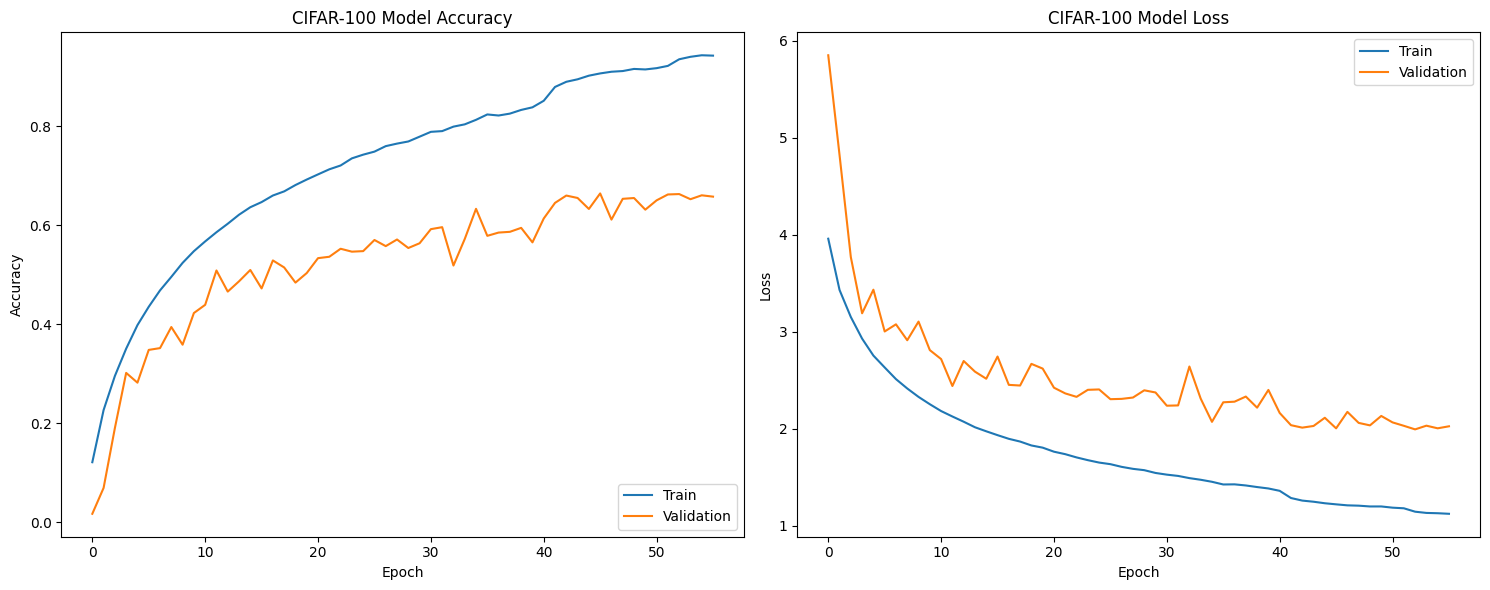

In [ ]:


plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CIFAR-100 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CIFAR-100 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:


test_loss, test_accuracy = model.evaluate(input_X_test, output_Y_test, verbose=VERBOSE)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


superclass_y_true = np.array([fine_to_coarse_mapping[y] for y in y_true])
superclass_y_pred = np.array([fine_to_coarse_mapping[y] for y in y_pred])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6535 - loss: 2.0435

Test Loss: 2.0352
Test Accuracy: 0.6567
